# Analisi univariata e bivariata


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder



In [2]:
df=pd.read_csv('../docs/csv/csvscenarioJunctionExo.csv',index_col=0)

In [12]:
df['stat-value_red_rTank3']

0       0
1       3
2       3
3       3
4       3
       ..
8120   -1
8121   -1
8122   -1
8123   -1
8124   -1
Name: stat-value_red_rTank3, Length: 8125, dtype: int64

In [8]:
df.columns

Index(['team_red_rTank3', 'name_red_rTank3', 'index_red_rTank3',
       'kind_red_rTank3', 'move_red_rTank3', 'load_red_rTank3',
       'hp_red_rTank3', 'hp_max_red_rTank3', 'int_atk_red_rTank3',
       'int-def_red_rTank3',
       ...
       'defense_antitank_blue_bExo2', 'weapon_CA_blue_bExo2',
       'weapon_AR_blue_bExo2', 'weapon_MG_blue_bExo2', 'weapon_AT_blue_bExo2',
       'weapon_MT_blue_bExo2', 'weapon_GR_blue_bExo2', 'weapon_SM_blue_bExo2',
       'weapon_SR_blue_bExo2', 'win'],
      dtype='object', length=241)

In [ ]:
c=df.select_dtypes(include='object').columns.tolist()


In [ ]:
le_df=df
le = preprocessing.LabelEncoder()
le_df[c] = df[c].apply(lambda col: le.fit_transform(col))

In [ ]:
x=le_df.columns
y=le_df['win']

In [ ]:
for i in x:
    sns.FacetGrid(le_df,hue='win',size=5).map(sns.distplot,i).add_legend()

In [ ]:
for i in range(len(x)):
    plt.figure()
    plt.plot(df[x[i]],y)
    # Show/save figure as desired.
    plt.show()

In [ ]:
x=le_df.columns
y=le_df['win']
for i in range(len(x)):
    plt.scatter(df.index,df[x[i]])
    plt.show()

In [ ]:
x=le_df.columns
y=le_df['win']
for i in range(len(x)):
    plt.hist(le_df[x[i]])
    plt.show()

In [ ]:
df['stat-name_red_Tank1'].value_counts().plot.bar()


In [ ]:
df['hp_red_Tank1'].value_counts().sort_index().plot.line()

In [ ]:

df['hp_red_Tank1'].plot.hist()

In [ ]:
le_df.plot.scatter(x='move_red_Tank1', y='win')

In [ ]:
for i in range(len(x)):
    sns.boxplot(x=x[i],y='win',data=le_df)
    plt.show()

# Analisi game


In [1]:
from agents.matchmanager import MatchManager

from itertools import product

from agents import GreedyAgent, AlphaBetaAgent, RandomAgent
from scenarios import scenarioJunction, scenarioJunctionExo, scenarioTest1v1, scenarioTest2v2
from core.const import RED, BLUE
from agents.ml.simple import SimpleMLAgent
import json
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
#metti un titolo+introduzione sopra ogni "grafico" per capire cosa stai facendo vedere

In [2]:
agents = ['RandomAgent','SimpleML','GreedyAgent']
scenarios = ['Test1v1', 'Test2v2', 'Junction']

In [3]:
all_json=[]
for i in range(0, 100):
    for s in scenarios:
        for agentRed, agentBlue in product(agents, agents):
            file_name=f'output/{agentRed}_{agentBlue}_{s}_{i}.json'
            data=json.load(open(file_name))
            all_json.append(data)            

In [ ]:
#importa tar gz e faccio loop su quello

In [4]:
iniziale=pd.DataFrame(all_json)

In [5]:
df=pd.DataFrame(all_json)

In [14]:
df

,scenario,seed,teamRed,teamBlue,winner
0,Test1v1,42,RandomAgent,RandomAgent,RandomAgent
1,Test1v1,42,RandomAgent,SimpleML,SimpleML
2,Test1v1,42,RandomAgent,GreedyAgent,GreedyAgent
3,Test1v1,42,SimpleML,RandomAgent,RandomAgent
4,Test1v1,42,SimpleML,SimpleML,SimpleML
...,...,...,...,...,...
2695,Junction,141,SimpleML,SimpleML,SimpleML
2696,Junction,141,SimpleML,GreedyAgent,GreedyAgent
2697,Junction,141,GreedyAgent,RandomAgent,GreedyAgent
2698,Junction,141,GreedyAgent,SimpleML,GreedyAgent


In [6]:
df.loc[(((df.teamRed == "SimpleML") & (df.winner=="red")) | ((df.teamBlue == "SimpleML") & (df.winner=="blue"))), "winner"] = "SimpleML"
df.loc[(((df.teamRed == "RandomAgent") & (df.winner=="red")) | ((df.teamBlue == "RandomAgent") & (df.winner=="blue"))), "winner"] = "RandomAgent"
df.loc[(((df.teamRed == "GreedyAgent") & (df.winner=="red")) | ((df.teamBlue == "GreedyAgent") & (df.winner=="blue"))), "winner"] = "GreedyAgent"


In [ ]:
#aggiungo colonna

In [ ]:
departments=df['scenario'].unique()
fig, ax = plt.subplots(len(departments), figsize=(8,15))
for i,name in enumerate(departments):
    sns.barplot(y=df[(df.scenario == name)]['winner'].value_counts(),x=df['winner'].unique() ,ax=ax[i])
    ax[i].set_title('scenario - {}'.format(name), fontsize=10)
plt.plot()  

#pensa a sistemarli con percntuali ecc

In [ ]:
#fagli vedere l'evoluzione-> sistemo tutto in delle funzioni così cambio solo il dataframe passato

Percentuale vincita SimpleML: 0.2896296296296296
Percentuale vincita RandomAgent: 0.2803703703703704
Percentuale vincita GreedyAgent: 0.43


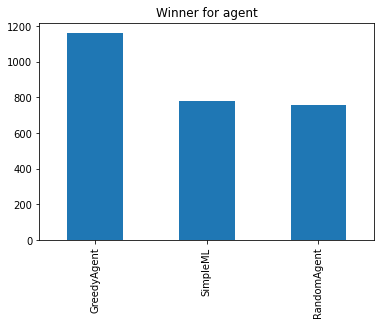

In [7]:
df['winner'].value_counts().plot.bar(title='Winner for agent')
print('Percentuale vincita SimpleML:',len(df[df['winner']=="SimpleML"])/len(df))
print('Percentuale vincita RandomAgent:',len(df[df['winner']=="RandomAgent"])/len(df))
print('Percentuale vincita GreedyAgent:',len(df[df['winner']=="GreedyAgent"])/len(df))

<AxesSubplot:title={'center':'Winner for agent simpleML vs simpleML'}>

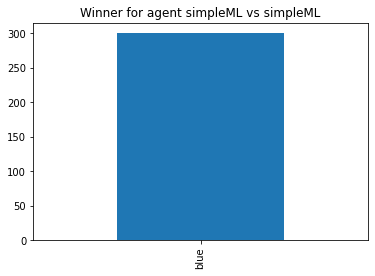

In [15]:
mask=iniziale.loc[(((iniziale.teamRed == "SimpleML") & (iniziale.teamBlue == "SimpleML")))]
mask['winner'].value_counts().plot.bar(title='Winner for agent simpleML vs simpleML')
#metti solo Junction

Percentuale vincita SimpleML su RandomAgent: 0.5033333333333333
Percentuale vincita SimpleML su Random su scenario: Test1v1 0.555
Percentuale vincita SimpleML su Random su scenario: Test2v2 0.455
Percentuale vincita SimpleML su Random su scenario: Junction 0.5


[]

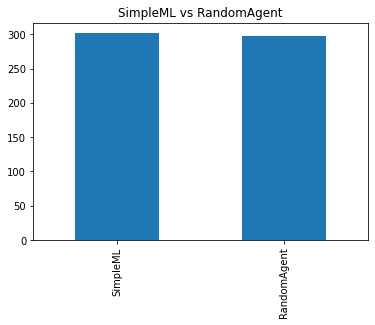

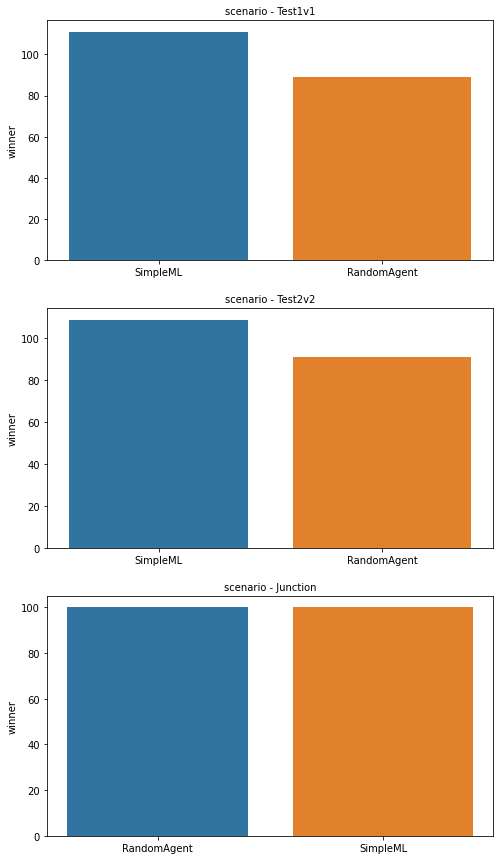

In [8]:
mask=df.loc[((df.teamRed == "SimpleML") & (df.teamBlue == "RandomAgent"))|((df.teamRed == "RandomAgent") & (df.teamBlue == "SimpleML"))]
mask['winner'].value_counts().plot.bar(title='SimpleML vs RandomAgent')
print('Percentuale vincita SimpleML su RandomAgent:',len(mask[mask['winner']=="SimpleML"])/len(mask))
departments=mask['scenario'].unique()

fig, ax = plt.subplots(len(departments), figsize=(8,15))
for i,name in enumerate(departments):
    dd=mask[(mask.scenario == name)]
    #devi fare groupby su colonna winner, poi fai il count e dividi sul totale
    sns.barplot(y=dd['winner'].value_counts(),x=dd['winner'].unique() ,ax=ax[i])
    ax[i].set_title('scenario - {}'.format(name), fontsize=10)
    print('Percentuale vincita SimpleML su Random su scenario:',name,len(dd[dd['winner']=="SimpleML"])/len(dd))

plt.plot() 
#plotta percentuali-> fai solo scenario junction (nel caso junctionexo)


Percentuale vincita SimpleML su GreedyAgent: 0.3
Percentuale vincita SimpleML su Greedy su scenario: Test1v1 0.37
Percentuale vincita SimpleML su Greedy su scenario: Test2v2 0.36
Percentuale vincita SimpleML su Greedy su scenario: Junction 0.17


[]

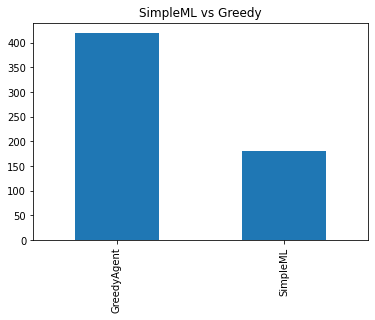

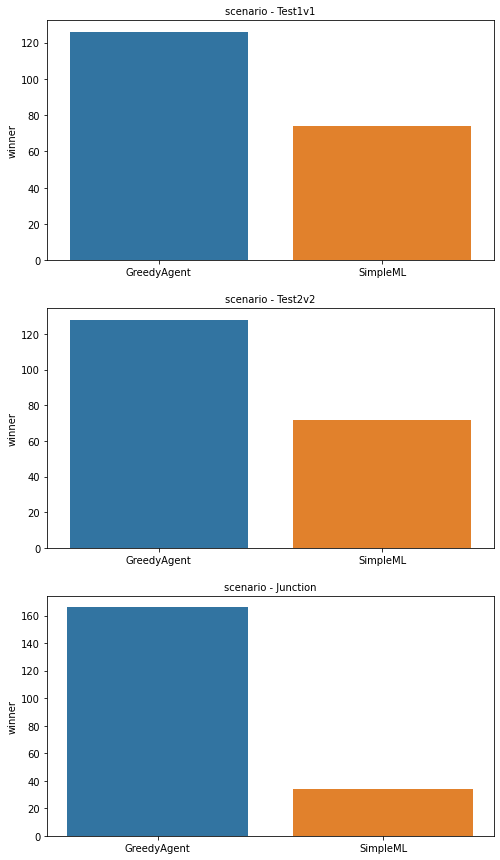

In [9]:
mask=df.loc[((df.teamRed == "GreedyAgent") & (df.teamBlue == "SimpleML")) | ((df.teamRed == "SimpleML") & (df.teamBlue == "GreedyAgent"))]
mask['winner'].value_counts().plot.bar(title='SimpleML vs Greedy')
print('Percentuale vincita SimpleML su GreedyAgent:',len(mask[mask['winner']=="SimpleML"])/len(mask))
#departments=['Junction','Test2v2']
departments=mask['scenario'].unique()
fig, ax = plt.subplots(len(departments), figsize=(8,15))
for i,name in enumerate(departments):
    dd=mask[(mask.scenario == name)]
    sns.barplot(y=dd['winner'].value_counts(),x=dd['winner'].unique() ,ax=ax[i])
    ax[i].set_title('scenario - {}'.format(name), fontsize=10)
    print('Percentuale vincita SimpleML su Greedy su scenario:',name,len(dd[dd['winner']=="SimpleML"])/len(dd))

plt.plot() 

#sistema grafico facendo vedere la percentuale

#plottare i grafici uno a fianco all'altro

Percentuale vincita SimpleML Red su RandomAgent Blue: 0.16666666666666666
Percentuale vincita SimpleML Red su Random Blue su scenario: Test1v1 0.42
Percentuale vincita SimpleML Red su Random Blue su scenario: Test2v2 0.03
Percentuale vincita SimpleML Red su Random Blue su scenario: Junction 0.05


[]

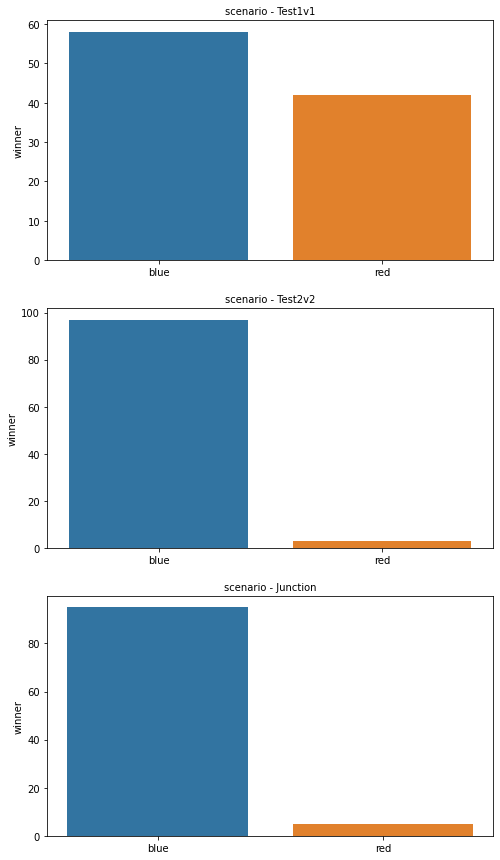

In [16]:
mask=iniziale.loc[((iniziale.teamRed == "SimpleML") & (iniziale.teamBlue == "RandomAgent"))]
print('Percentuale vincita SimpleML Red su RandomAgent Blue:',len(mask[mask['winner']=="red"])/len(mask))
departments=mask['scenario'].unique()

fig, ax = plt.subplots(len(departments), figsize=(8,15))
for i,name in enumerate(departments):
    dd=mask[(mask.scenario == name)]
    sns.barplot(y=dd['winner'].value_counts(),x=dd['winner'].unique() ,ax=ax[i])
    ax[i].set_title('scenario - {}'.format(name), fontsize=10)
    print('Percentuale vincita SimpleML Red su Random Blue su scenario:',name,len(dd[dd['winner']=="red"])/len(dd))

plt.plot() 
#metti perncetuale per ogni scenario



Percentuale vincita SimpleML Blue su RandomAgent Red: 0.84
Percentuale vincita SimpleML Blue su Random Red su scenario: Test1v1 0.69
Percentuale vincita SimpleML Blue su Random Red su scenario: Test2v2 0.88
Percentuale vincita SimpleML Blue su Random Red su scenario: Junction 0.95


[]

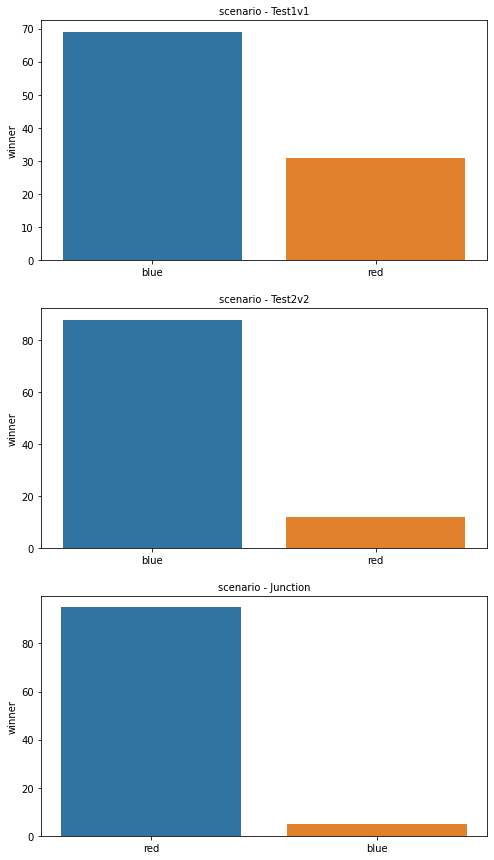

In [11]:
mask=iniziale.loc[((iniziale.teamRed == "RandomAgent") & (iniziale.teamBlue == "SimpleML"))]
print('Percentuale vincita SimpleML Blue su RandomAgent Red:',len(mask[mask['winner']=="blue"])/len(mask))
departments=mask['scenario'].unique()

fig, ax = plt.subplots(len(departments), figsize=(8,15))
for i,name in enumerate(departments):
    dd=mask[(mask.scenario == name)]
    sns.barplot(y=dd['winner'].value_counts(),x=dd['winner'].unique() ,ax=ax[i])
    ax[i].set_title('scenario - {}'.format(name), fontsize=10)
    print('Percentuale vincita SimpleML Blue su Random Red su scenario:',name,len(dd[dd['winner']=="blue"])/len(dd))

plt.plot() 
#metti perncetuale per ogni scenario

Percentuale vincita SimpleML Blue su GreedyAgent Red: 0.5866666666666667
Percentuale vincita SimpleML Blue su Greedy Red su scenario: Test1v1 0.74
Percentuale vincita SimpleML Blue su Greedy Red su scenario: Test2v2 0.72
Percentuale vincita SimpleML Blue su Greedy Red su scenario: Junction 0.3


[]

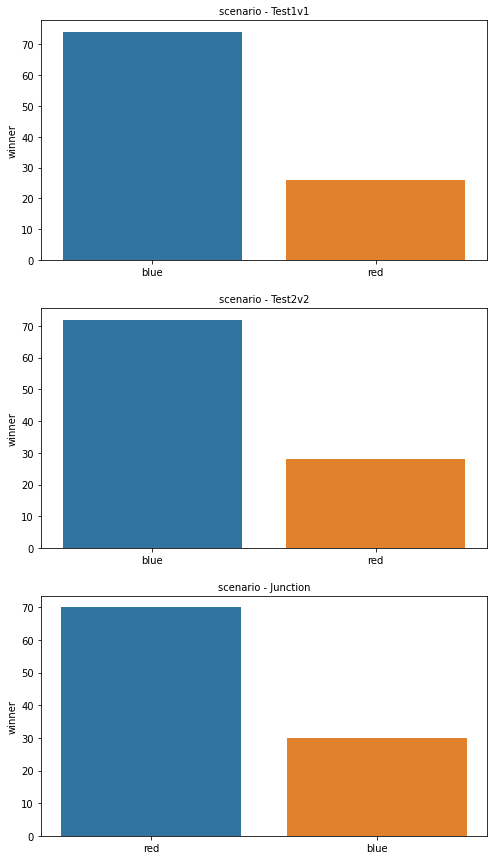

In [12]:
mask=iniziale.loc[((iniziale.teamRed == "GreedyAgent") & (iniziale.teamBlue == "SimpleML"))]
print('Percentuale vincita SimpleML Blue su GreedyAgent Red:',len(mask[mask['winner']=="blue"])/len(mask))
departments=mask['scenario'].unique()

fig, ax = plt.subplots(len(departments), figsize=(8,15))
for i,name in enumerate(departments):
    dd=mask[(mask.scenario == name)]
    sns.barplot(y=dd['winner'].value_counts(),x=dd['winner'].unique() ,ax=ax[i])
    ax[i].set_title('scenario - {}'.format(name), fontsize=10)
    print('Percentuale vincita SimpleML Blue su Greedy Red su scenario:',name,len(dd[dd['winner']=="blue"])/len(dd))

plt.plot() 
#metti perncetuale per ogni scenario

Percentuale vincita SimpleML Red su GreedyAgent Blue: 0.013333333333333334
Percentuale vincita SimpleML Red su Greedy Blue su scenario: Test1v1 0.0
Percentuale vincita SimpleML Red su Greedy Blue su scenario: Test2v2 0.0
Percentuale vincita SimpleML Red su Greedy Blue su scenario: Junction 0.04


[]

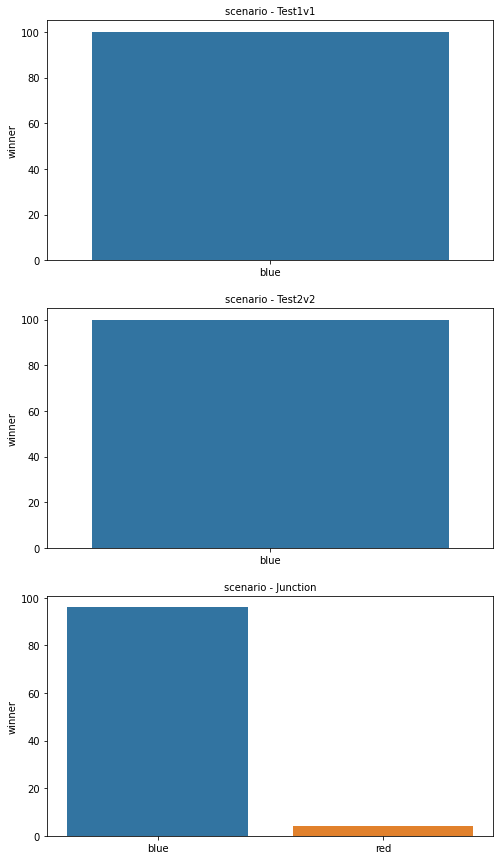

In [13]:
mask=iniziale.loc[((iniziale.teamRed == "SimpleML") & (iniziale.teamBlue == "GreedyAgent"))]
print('Percentuale vincita SimpleML Red su GreedyAgent Blue:',len(mask[mask['winner']=="red"])/len(mask))
departments=mask['scenario'].unique()

fig, ax = plt.subplots(len(departments), figsize=(8,15))
for i,name in enumerate(departments):
    dd=mask[(mask.scenario == name)]
    sns.barplot(y=dd['winner'].value_counts(),x=dd['winner'].unique() ,ax=ax[i])
    ax[i].set_title('scenario - {}'.format(name), fontsize=10)
    print('Percentuale vincita SimpleML Red su Greedy Blue su scenario:',name,len(dd[dd['winner']=="red"])/len(dd))

plt.plot() 
#metti perncetuale per ogni scenario